If there are problem occur in the beginning, try delete all # of the cell below to install lib and Run All again :)

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install scipy
# !pip install -U scikit-learn


Import necessary library and read files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
from mpl_toolkits.mplot3d import Axes3D

mm = "_Temp_Member_Metrics.csv"
mmp = "_Temp_Member_Metrics_Previous.csv"

Member_Metrics = pd.read_csv(mm)
Member_Metrics_Previous = pd.read_csv(mmp)


In [3]:
print(Member_Metrics.shape)
Member_Metrics


(598939, 6)


,MEMBER_ID,total_sales,member_txns,member_QTYs,last_purch_dt,recency
0,LM0007043817381,1613.00,1,2,2022-06-10,385
1,LM0007040328057,891.00,1,1,2022-06-05,390
2,LM*0447570,2990.00,1,1,2023-04-19,72
3,LM*0469683,2080.00,1,2,2023-05-13,48
4,LM0007043418083,441.00,1,1,2022-07-13,352
...,...,...,...,...,...,...
598934,LM0007042756872,11568.00,3,4,2022-05-29,32
598935,LM1022190258879,5083.50,2,4,2022-05-29,32
598936,LM0007042747283,64864.25,11,42,2022-05-25,36
598937,LM0007045096036,2577.00,2,4,2022-05-28,33


In [4]:
print(Member_Metrics_Previous.shape)
Member_Metrics_Previous

(395023, 6)


,MEMBER_ID,total_sales,member_txns,member_QTYs,last_purch_dt,recency
0,LM0007043817381,1613.0,1,2,2022-06-10,385
1,LM0007040328057,891.0,1,1,2022-06-05,390
2,LM*0447570,2990.0,1,1,2023-04-19,72
3,LM*0469683,2080.0,1,2,2023-05-13,48
4,LM0007043418083,441.0,1,1,2022-07-13,352
...,...,...,...,...,...,...
395018,LM1021190333036,1071.0,1,1,2022-07-17,348
395019,LM*0398801,1342.5,1,1,2023-02-28,122
395020,LM*0396695,20490.0,1,18,2023-02-26,124
395021,LM1022190222863,2132.0,1,6,2022-07-30,335


Transform purchase history data to RFM

In [5]:
# Calculate RFM metrics
recency = Member_Metrics['recency']
frequency = Member_Metrics['member_txns']
monetary = Member_Metrics['total_sales']
recency_prev = Member_Metrics_Previous['recency']
frequency_prev = Member_Metrics_Previous['member_txns']
monetary_prev = Member_Metrics_Previous['total_sales']

# Create a new DataFrame with RFM metrics
rfm_df = pd.DataFrame({'Member_ID': Member_Metrics['MEMBER_ID'], 'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})
rfm_prev_df = pd.DataFrame({'Member_ID': Member_Metrics_Previous['MEMBER_ID'], 'Recency': recency_prev, 'Frequency': frequency_prev, 'Monetary': monetary_prev})

# Drop rows with NaN values in every column
rfm_df = rfm_df.dropna(how='all')
rfm_prev_df = rfm_prev_df.dropna(how='all')

rfm_df.to_csv('rfm_with_outliner.csv', index=False)


In [6]:
rfm_df

,Member_ID,Recency,Frequency,Monetary
0,LM0007043817381,385,1,1613.00
1,LM0007040328057,390,1,891.00
2,LM*0447570,72,1,2990.00
3,LM*0469683,48,1,2080.00
4,LM0007043418083,352,1,441.00
...,...,...,...,...
598934,LM0007042756872,32,3,11568.00
598935,LM1022190258879,32,2,5083.50
598936,LM0007042747283,36,11,64864.25
598937,LM0007045096036,33,2,2577.00


In [7]:
rfm_prev_df

,Member_ID,Recency,Frequency,Monetary
0,LM0007043817381,385,1,1613.0
1,LM0007040328057,390,1,891.0
2,LM*0447570,72,1,2990.0
3,LM*0469683,48,1,2080.0
4,LM0007043418083,352,1,441.0
...,...,...,...,...
395018,LM1021190333036,348,1,1071.0
395019,LM*0398801,122,1,1342.5
395020,LM*0396695,124,1,20490.0
395021,LM1022190222863,335,1,2132.0


## Begin Outlier Identification

Create new data frame that Normalize the 'Recency', 'Frequency', and 'Monetary' to value in range 0-1 by using MinMaxScaler()

In [8]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the 'Recency', 'Frequency', and 'Monetary' columns
rfm_df_normalized = rfm_df.copy()
rfm_df_normalized[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm_df_normalized[['Recency', 'Frequency', 'Monetary']])

rfm_prev_df_normalized = rfm_prev_df.copy()
rfm_prev_df_normalized[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm_prev_df_normalized[['Recency', 'Frequency', 'Monetary']])

Create a DataFrame that contains the normalized values from the previous cell and also includes 3 new columns to store the count of rows of R,F,M where the normalized value is less than or equal to that value. (This additional count column will help in identifying potential outliers in the data)

In [9]:
def get_count_percentile(df):
    # Calculate percentiles from 0 to 1 with a step of 0.00001
    percentiles = np.arange(0, 1, 0.00001)

    counts_R = np.array([np.sum(df['Recency'] <= percentile) for percentile in percentiles])
    counts_F = np.array([np.sum(df['Frequency'] <= percentile) for percentile in percentiles])
    counts_M = np.array([np.sum(df['Monetary'] <= percentile) for percentile in percentiles])

    count_percentile = pd.DataFrame({'Normalized_value': percentiles, 'R_Count': counts_R, 'F_Count': counts_F, 'M_Count': counts_M})

    max_value = (df.index.max() + 1)
    count_percentile['R_percentile'] = count_percentile['R_Count'] / max_value
    count_percentile['F_percentile'] = count_percentile['F_Count'] / max_value
    count_percentile['M_percentile'] = count_percentile['M_Count'] / max_value

    return count_percentile

# Assuming you already have rfm_df_normalized and rfm_prev_df_normalized DataFrames
RFM_count_percentile = get_count_percentile(rfm_df_normalized)
RFM_count_percentile_prev = get_count_percentile(rfm_prev_df_normalized)


In [10]:
# Save DataFrame to CSV
RFM_count_percentile.to_csv('RFM_count_percentile.csv', index=False)
RFM_count_percentile_prev.to_csv('RFM_count_percentile_prev.csv', index=False)


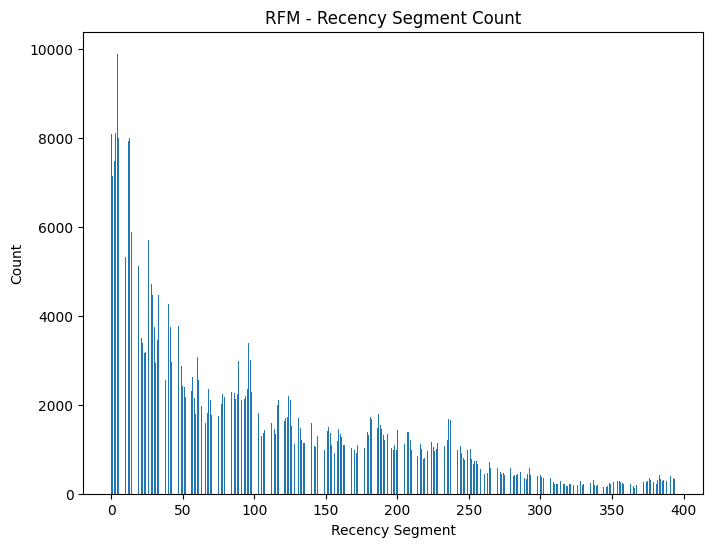

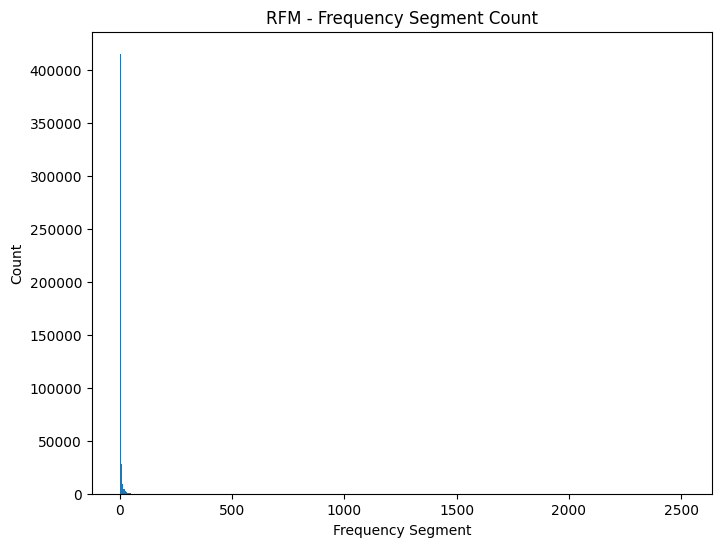

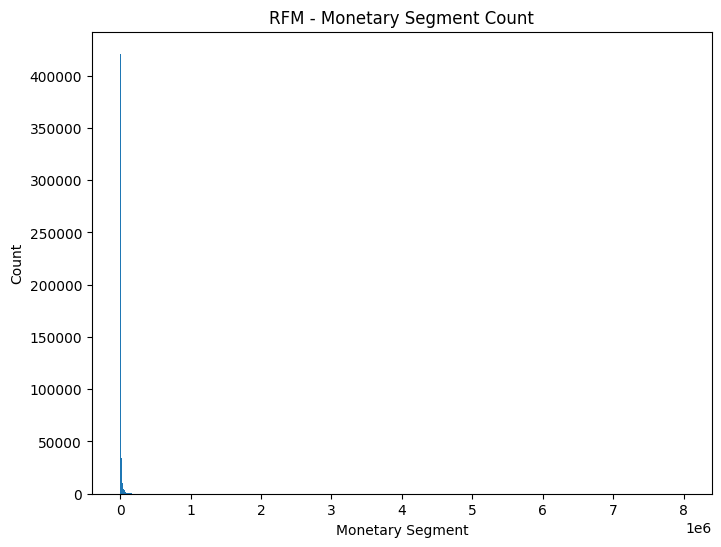

In [11]:
# Number of bins for the histograms
num_bins = 1000

# Plot the histogram for Recency
plt.figure(figsize=(8, 6))
plt.hist(rfm_df['Recency'], bins=num_bins)
plt.xlabel('Recency Segment')
plt.ylabel('Count')
plt.title('RFM - Recency Segment Count')
plt.show()

# Plot the histogram for Frequency
plt.figure(figsize=(8, 6))
plt.hist(rfm_df['Frequency'], bins=num_bins)
plt.xlabel('Frequency Segment')
plt.ylabel('Count')
plt.title('RFM - Frequency Segment Count')
plt.show()

# Plot the histogram for Monetary
plt.figure(figsize=(8, 6))
plt.hist(rfm_df['Monetary'], bins=num_bins)
plt.xlabel('Monetary Segment')
plt.ylabel('Count')
plt.title('RFM - Monetary Segment Count')
plt.show()


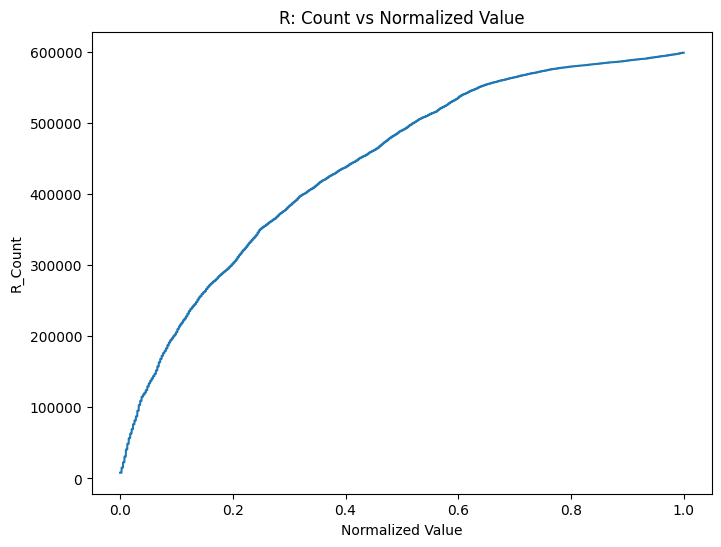

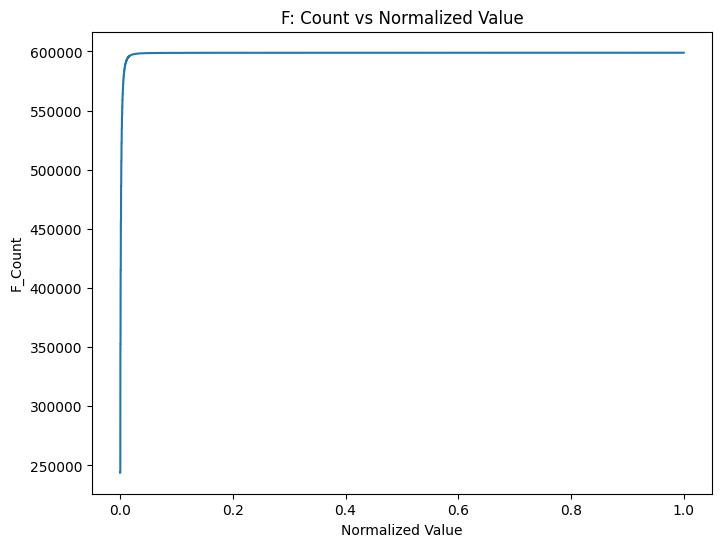

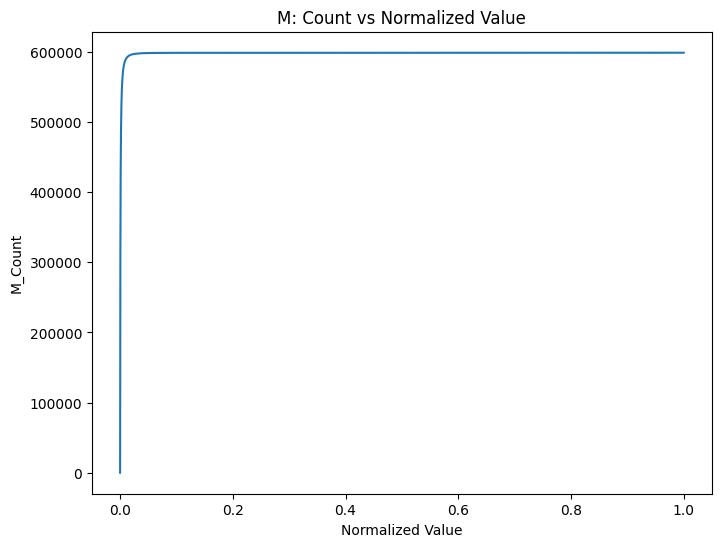

In [12]:
# Plot R count-percentile
plt.figure(figsize=(8, 6))
plt.plot(RFM_count_percentile['Normalized_value'], RFM_count_percentile['R_Count'])
plt.xlabel('Normalized Value')
plt.ylabel('R_Count')
plt.title('R: Count vs Normalized Value')
plt.show()

# Plot F count-percentile
plt.figure(figsize=(8, 6))
plt.plot(RFM_count_percentile['Normalized_value'], RFM_count_percentile['F_Count'])
plt.xlabel('Normalized Value')
plt.ylabel('F_Count')
plt.title('F: Count vs Normalized Value')
plt.show()

# Plot M count-percentile
plt.figure(figsize=(8, 6))
plt.plot(RFM_count_percentile['Normalized_value'], RFM_count_percentile['M_Count'])
plt.xlabel('Normalized Value')
plt.ylabel('M_Count')
plt.title('M: Count vs Normalized Value')
plt.show()

Find point where count in RFM_count_percentile has highest change to use as lower bound cutoff point

In [13]:
def find_highest_change(df):
    # Calculate the differences between consecutive percentiles
    diff_R = np.diff(df['R_percentile'])
    diff_F = np.diff(df['F_percentile'])
    diff_M = np.diff(df['M_percentile'])

    # Find the index of the highest change
    max_change_index_R = np.argmax(diff_R)
    max_change_index_F = np.argmax(diff_F)
    max_change_index_M = np.argmax(diff_M)

    # Get the highest change values for each variable
    max_change_R = diff_R[max_change_index_R]
    max_change_F = diff_F[max_change_index_F]
    max_change_M = diff_M[max_change_index_M]

    # Get the first row values
    initial_change_R = df['R_percentile'][0]
    initial_change_F = df['F_percentile'][0]
    initial_change_M = df['M_percentile'][0]

    # Check if the highest change values are lower than the initial change values
    if max_change_R < initial_change_R:
        max_change_R = initial_change_R
        max_change_index_R = 0

    if max_change_F < initial_change_F:
        max_change_F = initial_change_F
        max_change_index_F = 0

    if max_change_M < initial_change_M:
        max_change_M = initial_change_M
        max_change_index_M = 0

    # Calculate the lower cutoff index for each variable
    try:
        lower_cutoff_index_R = max_change_index_R - np.where(df['R_percentile'][:max_change_index_R] == df['R_percentile'][max_change_index_R])[0][-1]
    except IndexError:
        lower_cutoff_index_R = max_change_index_R

    try:
        lower_cutoff_index_F = max_change_index_F - np.where(df['F_percentile'][:max_change_index_F] == df['F_percentile'][max_change_index_F])[0][-1]
    except IndexError:
        lower_cutoff_index_F = max_change_index_F

    try:
        lower_cutoff_index_M = max_change_index_M - np.where(df['M_percentile'][:max_change_index_M] == df['M_percentile'][max_change_index_M])[0][-1]
    except IndexError:
        lower_cutoff_index_M = max_change_index_M

    # Check if the index is 0 and assign a value of 0 to the percentile
    lower_bound_percentile_R = df['R_percentile'][lower_cutoff_index_R - 1] if lower_cutoff_index_R > 0 else 0
    lower_bound_percentile_F = df['F_percentile'][lower_cutoff_index_F - 1] if lower_cutoff_index_F > 0 else 0
    lower_bound_percentile_M = df['M_percentile'][lower_cutoff_index_M - 1] if lower_cutoff_index_M > 0 else 0

    # Print the highest change values and their corresponding percentiles
    print("Highest change in R:")
    print("Normalized_value: ", df['Normalized_value'][max_change_index_R])
    print("Percentile: ", df['R_percentile'][max_change_index_R])
    print("Change value: ", max_change_R)

    print("\nHighest change in F:")
    print("Normalized_value: ", df['Normalized_value'][max_change_index_F])
    print("Percentile: ", df['F_percentile'][max_change_index_F])
    print("Change value: ", max_change_F)

    print("\nHighest change in M:")
    print("Normalized_value: ", df['Normalized_value'][max_change_index_M])
    print("Percentile: ", df['M_percentile'][max_change_index_M])
    print("Change value: ", max_change_M)

    # Print the percentiles of R, F, and M
    print("\nLower bound cutoff Percentile of R: ", lower_bound_percentile_R)
    print("Lower bound cutoff Percentile of F: ", lower_bound_percentile_F)
    print("Lower bound cutoff Percentile of M: ", lower_bound_percentile_M)

    return lower_bound_percentile_R, lower_bound_percentile_F, lower_bound_percentile_M, diff_R, diff_F, diff_M

# Assuming you have the RFM_count_percentile and RFM_count_percentile_prev DataFrames
lower_bound_percentile_R, lower_bound_percentile_F, lower_bound_percentile_M, diff_R, diff_F, diff_M = find_highest_change(RFM_count_percentile)
print("\n---------------------------------------------------------------------------------------------------------------\n")
lower_bound_percentile_R_prev, lower_bound_percentile_F_prev, lower_bound_percentile_M_prev, diff_R_prev, diff_F_prev, diff_M_prev = find_highest_change(RFM_count_percentile_prev)


Highest change in R:
Normalized_value:  0.010150000000000001
Percentile:  0.05149940144154914
Change value:  0.01653089880605537

Highest change in F:
Normalized_value:  0.0
Percentile:  0.4071065667789207
Change value:  0.4071065667789207

Highest change in M:
Normalized_value:  0.00019
Percentile:  0.1785123359807927
Change value:  0.020833507251990624

Lower bound cutoff Percentile of R:  0.013510557836440772
Lower bound cutoff Percentile of F:  0
Lower bound cutoff Percentile of M:  0.16560117140476743

---------------------------------------------------------------------------------------------------------------

Highest change in R:
Normalized_value:  0.010150000000000001
Percentile:  0.06852512385354777
Change value:  0.020330461770580455

Highest change in F:
Normalized_value:  0.0
Percentile:  0.4390529159061624
Change value:  0.4390529159061624

Highest change in M:
Normalized_value:  0.00021
Percentile:  0.22041754530748842
Change value:  0.02179873070681962

Lower bound cut

Calculate upper bound cutoff point by using skewness

In [14]:
def calculate_upper_bound_percentile(df, count_df, diff_R, diff_F, diff_M):
    # Calculate the absolute differences
    abs_diff_R = np.abs(diff_R[diff_R != 0])
    abs_diff_F = np.abs(diff_F[diff_F != 0])
    abs_diff_M = np.abs(diff_M[diff_M != 0])

    # Insert the first element of df at index 0 of the respective absolute difference arrays
    abs_diff_R = np.insert(abs_diff_R, 0, count_df['R_percentile'][0])
    abs_diff_F = np.insert(abs_diff_F, 0, count_df['F_percentile'][0])
    abs_diff_M = np.insert(abs_diff_M, 0, count_df['M_percentile'][0])

    # Calculate the average of the absolute differences
    avg_abs_diff_R = np.mean(abs_diff_R)
    avg_abs_diff_F = np.mean(abs_diff_F)
    avg_abs_diff_M = np.mean(abs_diff_M)

    # Calculate buffer and std_diff_M for R
    std_diff_R = np.std(np.abs(diff_R[diff_R != 0]))
    buffer_R = avg_abs_diff_R / std_diff_R

    # Calculate buffer and std_diff_M for F
    std_diff_F = np.std(np.abs(diff_F[diff_F != 0]))
    buffer_F = avg_abs_diff_F / std_diff_F

    std_diff_M = np.std(np.abs(diff_M[diff_M != 0]))
    buffer_M = avg_abs_diff_M / std_diff_M

    # Calculate skewness for each column (R, F, and M)
    skewness_R = skew(df['Recency'])
    skewness_F = skew(df['Frequency'])
    skewness_M = skew(df['Monetary'])

    # Define the standardize_skewness function
    def standardize_skewness(skewness):
        return (skewness + 100) / 200

    # Calculate standardized skewness for each column
    standardized_skewness_R = standardize_skewness(skewness_R)
    standardized_skewness_F = standardize_skewness(skewness_F)
    standardized_skewness_M = standardize_skewness(skewness_M)

    # Find the index where the differences start to be very low
    upper_bound_percentile_R = 1 - (0.04 * (standardized_skewness_R * (1 - buffer_R)))
    upper_bound_percentile_F = 1 - (0.04 * (standardized_skewness_F * (1 - buffer_F)))
    upper_bound_percentile_M = 1 - (0.04 * (standardized_skewness_M * (1 - buffer_M)))

    # If the calculated value is greater than 1, set it to 1
    upper_bound_percentile_R = min(upper_bound_percentile_R, 1)
    upper_bound_percentile_F = min(upper_bound_percentile_F, 1)
    upper_bound_percentile_M = min(upper_bound_percentile_M, 1)
    
    # Print the indices
    print("Upper bound cutoff Percentile of R: ", upper_bound_percentile_R)
    print("Upper bound cutoff Percentile of F: ", upper_bound_percentile_F)
    print("Upper bound cutoff Percentile of M: ", upper_bound_percentile_M)

    return upper_bound_percentile_R, upper_bound_percentile_F, upper_bound_percentile_M

# Assuming you have the RFM_count_percentile DataFrame and diff_R, diff_F, and diff_M arrays
upper_bound_percentile_R, upper_bound_percentile_F, upper_bound_percentile_M = calculate_upper_bound_percentile(rfm_df_normalized, RFM_count_percentile, diff_R, diff_F, diff_M)
upper_bound_percentile_R_prev, upper_bound_percentile_F_prev, upper_bound_percentile_M_prev = calculate_upper_bound_percentile(rfm_prev_df_normalized, RFM_count_percentile_prev, diff_R_prev, diff_F_prev, diff_M_prev)


Upper bound cutoff Percentile of R:  0.9997061035162731
Upper bound cutoff Percentile of F:  0.9739685762754978
Upper bound cutoff Percentile of M:  0.9734228447337865
Upper bound cutoff Percentile of R:  0.9970614824607029
Upper bound cutoff Percentile of F:  0.9749286004638487
Upper bound cutoff Percentile of M:  0.973030852263388


Get all MEMBER_ID that consider as outliner

In [15]:
def identify_outliers(df, lower_bound_percentile_R, upper_bound_percentile_R, lower_bound_percentile_F, upper_bound_percentile_F, lower_bound_percentile_M, upper_bound_percentile_M):
    # Identify outliers based on lower and upper percentile bounds
    lower_bound_R = rfm_df_normalized['Recency'].quantile(lower_bound_percentile_R)
    upper_bound_R = rfm_df_normalized['Recency'].quantile(upper_bound_percentile_R)

    lower_bound_F = rfm_df_normalized['Frequency'].quantile(lower_bound_percentile_F)
    upper_bound_F = rfm_df_normalized['Frequency'].quantile(upper_bound_percentile_F)

    lower_bound_M = rfm_df_normalized['Monetary'].quantile(lower_bound_percentile_M)
    upper_bound_M = rfm_df_normalized['Monetary'].quantile(upper_bound_percentile_M)

    outliers_R = rfm_df_normalized[(rfm_df_normalized['Recency'] < lower_bound_R) | (rfm_df_normalized['Recency'] > upper_bound_R)]
    outliers_F = rfm_df_normalized[(rfm_df_normalized['Frequency'] < lower_bound_F) | (rfm_df_normalized['Frequency'] > upper_bound_F)]
    outliers_M = rfm_df_normalized[(rfm_df_normalized['Monetary'] < lower_bound_M) | (rfm_df_normalized['Monetary'] > upper_bound_M)]

    # Print the identified outliers
    print("Outliers in R:", len(outliers_R))
    print("Lower Bound Outliers:", len(rfm_df_normalized[rfm_df_normalized['Recency'] < lower_bound_R]))
    print("Upper Bound Outliers:", len(rfm_df_normalized[rfm_df_normalized['Recency'] > upper_bound_R]))
    print("Lower Bound for M:", lower_bound_R)
    print("Upper Bound for M:", upper_bound_R)

    print("\nOutliers in F:", len(outliers_F))
    print("Lower Bound Outliers:", len(rfm_df_normalized[rfm_df_normalized['Frequency'] < lower_bound_F]))
    print("Upper Bound Outliers:", len(rfm_df_normalized[rfm_df_normalized['Frequency'] > upper_bound_F]))
    print("Lower Bound for M:", lower_bound_F)
    print("Upper Bound for M:", upper_bound_F)

    print("\nOutliers in M:", len(outliers_M))
    print("Lower Bound Outliers:", len(rfm_df_normalized[rfm_df_normalized['Monetary'] < lower_bound_M]))
    print("Upper Bound Outliers:", len(rfm_df_normalized[rfm_df_normalized['Monetary'] > upper_bound_M]))
    print("Lower Bound for M:", lower_bound_M)
    print("Upper Bound for M:", upper_bound_M)
    
    return outliers_R, outliers_F, outliers_M

# Create a new DataFrame to store the bounds
bounds_df = pd.DataFrame({
    'Attribute': ['Recency', 'Frequency', 'Monetary', 'Recency Previous', 'Frequency Previous', 'Monetary Previous'],
    'Lower Bound': [lower_bound_percentile_R, lower_bound_percentile_F, lower_bound_percentile_M, lower_bound_percentile_R_prev, lower_bound_percentile_F_prev, lower_bound_percentile_M_prev],
    'Upper Bound': [upper_bound_percentile_R, upper_bound_percentile_F, upper_bound_percentile_M, upper_bound_percentile_R_prev, upper_bound_percentile_F_prev, upper_bound_percentile_M_prev],
})

# Save bounds_df to a CSV file named 'bounds.csv' (you can change the filename as needed)
bounds_df.to_csv('bounds.csv', index=False)

# Apply the function to rfm_df_normalized
outliers_R, outliers_F, outliers_M = identify_outliers(rfm_df_normalized, lower_bound_percentile_R, upper_bound_percentile_R, lower_bound_percentile_F, upper_bound_percentile_F, lower_bound_percentile_M, upper_bound_percentile_M)
print("\n-----------------------------------------------------------------------------------------------------------------------\n")
# Apply the function to rfm_prev_df_normalized
outliers_R_prev, outliers_F_prev, outliers_M_prev = identify_outliers(rfm_prev_df_normalized, lower_bound_percentile_R_prev, upper_bound_percentile_R_prev, lower_bound_percentile_F_prev, upper_bound_percentile_F_prev, lower_bound_percentile_M_prev, upper_bound_percentile_M_prev)


Outliers in R: 8092
Lower Bound Outliers: 8092
Upper Bound Outliers: 0
Lower Bound for M: 0.0025037803100618878
Upper Bound for M: 0.9999999999999999

Outliers in F: 15123
Lower Bound Outliers: 0
Upper Bound Outliers: 15123
Lower Bound for M: 0.0
Upper Bound for M: 0.007171314741035857

Outliers in M: 115104
Lower Bound Outliers: 99185
Upper Bound Outliers: 15919
Lower Bound for M: 0.00018004407585020646
Upper Bound for M: 0.007238145558746977

-----------------------------------------------------------------------------------------------------------------------

Outliers in R: 9642
Lower Bound Outliers: 8092
Upper Bound Outliers: 1550
Lower Bound for M: 0.0025380710659898475
Upper Bound for M: 0.9898477157360406

Outliers in F: 13711
Lower Bound Outliers: 0
Upper Bound Outliers: 13711
Lower Bound for M: 0.0
Upper Bound for M: 0.007569721115537848

Outliers in M: 139956
Lower Bound Outliers: 123803
Upper Bound Outliers: 16153
Lower Bound for M: 0.00020699071750127367
Upper Bound for M:

Combine all outliner of R, F and M to one dataframe

In [16]:
# Create a new DataFrame to store the Member_ID of outliers
outliers_df = pd.DataFrame()
outliers_df['Member_ID'] = pd.concat([outliers_R['Member_ID'], outliers_F['Member_ID'], outliers_M['Member_ID']])

# Drop duplicate entries
outliers_df = outliers_df.drop_duplicates()

# Calculate the length of outliers
outliers_length = len(outliers_df)

# Calculate the percentage of outliers
outliers_percentage = (outliers_length / len(rfm_df)) * 100

outliers_df.to_csv('outliers.csv', index=False)

# Print the length and percentage of outliers
print("Number of outliers in rfm_df:", outliers_length)
print("Percentage of outliers in rfm_df: {:.2f}%".format(outliers_percentage))
print(outliers_df)


Number of outliers in rfm_df: 115973
Percentage of outliers in rfm_df: 19.36%
              Member_ID
7       LM0007044513848
119     LM0007042179190
121          LM*0516689
124     LM0007045525475
149          LM*0454975
...                 ...
598909  LM0007042417360
598910  LM0007044635441
598911  LM0007042943036
598912  LM0007041883760
598936  LM0007042747283

[115973 rows x 1 columns]


In [17]:
# Create a new DataFrame to store the Member_ID of outliers for rfm_prev_df
outliers_df_prev = pd.DataFrame()
outliers_df_prev['Member_ID'] = pd.concat([outliers_R_prev['Member_ID'], outliers_F_prev['Member_ID'], outliers_M_prev['Member_ID']])

# Drop duplicate entries
outliers_df_prev = outliers_df_prev.drop_duplicates()

# Calculate the length of outliers
outliers_length_prev = len(outliers_df_prev)

# Calculate the percentage of outliers
outliers_percentage_prev = (outliers_length_prev / len(rfm_prev_df)) * 100

# Print the length and percentage of outliers for rfm_prev_df
print("Number of outliers in rfm_prev_df:", outliers_length_prev)
print("Percentage of outliers in rfm_prev_df: {:.2f}%".format(outliers_percentage_prev))
print(outliers_df_prev)


Number of outliers in rfm_prev_df: 138958
Percentage of outliers in rfm_prev_df: 35.18%
              Member_ID
7       LM0007044513848
101     LM0007043564438
119     LM0007042179190
121          LM*0516689
124     LM0007045525475
...                 ...
598910  LM0007044635441
598911  LM0007042943036
598912  LM0007041883760
598914  LM0007045238856
598936  LM0007042747283

[138958 rows x 1 columns]


Remove outliner from main data frame

In [18]:
# Remove rows with Member_ID present in outliers_df from rfm_df
rfm_df = rfm_df[~rfm_df['Member_ID'].isin(outliers_df['Member_ID'])]

# Remove rows with Member_ID present in outliers_df from rfm_df_normalized
rfm_df_normalized = rfm_df_normalized[~rfm_df_normalized['Member_ID'].isin(outliers_df['Member_ID'])]

# Reset the indices of the updated DataFrames
rfm_df.reset_index(drop=True, inplace=True)
rfm_df_normalized.reset_index(drop=True, inplace=True)

# Print the lengths of the updated DataFrames
print("Length of rfm_df:", len(rfm_df))
print("Length of rfm_df_normalized:", len(rfm_df_normalized))


Length of rfm_df: 437200
Length of rfm_df_normalized: 437200


In [19]:
# Remove rows with Member_ID present in outliers_df from rfm_prev_df
rfm_prev_df = rfm_prev_df[~rfm_prev_df['Member_ID'].isin(outliers_df_prev['Member_ID'])]

# Remove rows with Member_ID present in outliers_df from rfm_prev_df_normalized
rfm_prev_df_normalized = rfm_prev_df_normalized[~rfm_prev_df_normalized['Member_ID'].isin(outliers_df_prev['Member_ID'])]

# Reset the indices of the updated DataFrames
rfm_prev_df.reset_index(drop=True, inplace=True)
rfm_prev_df_normalized.reset_index(drop=True, inplace=True)

# Print the lengths of the updated DataFrames
print("Length of rfm_prev_df:", len(rfm_prev_df))
print("Length of rfm_prev_df_normalized:", len(rfm_prev_df_normalized))


Length of rfm_prev_df: 271651
Length of rfm_prev_df_normalized: 271651


## End of Outlier Identification

--------------------------------------------------------------------------------------------------------------------------

## Begin RFM segmentation

Score the Recency, Frequency and Monetary of customer in range 1-5 or ['Low', 'Mid-Low', 'Mid', 'Mid-High', 'High'] by using percentile
<br>Error handle: there is some issue at 9th line about bin and bin edge, to fix it try change plus value after q=len(level) to difference value ex(+4, +5, etc.)

In [20]:
level = ['Low', 'Mid-Low', 'Mid', 'Mid-High', 'High']

# Assign bin labels to the DataFrame for Recency
rfm_segments = pd.qcut(rfm_df['Recency'], q=len(level), labels=level[::-1], duplicates='drop')
rfm_df['R'] = rfm_segments.values
rfm_df['R_Score'] = 5 - rfm_segments.cat.codes

# Assign bin labels to the DataFrame for Frequency
rfm_segments = pd.qcut(rfm_df['Frequency'], q=len(level) +3, labels=level, duplicates='drop')
rfm_df['F'] = rfm_segments.values
rfm_df['F_Score'] = rfm_segments.cat.codes + 1

# Assign bin labels to the DataFrame for Monetary
rfm_segments = pd.qcut(rfm_df['Monetary'], q=len(level), labels=level)
rfm_df['M'] = rfm_segments.values
rfm_df['M_Score'] = rfm_segments.cat.codes + 1

rfm_df


C:\Users\Kunnithi\AppData\Local\Temp\ipykernel_10784\3321892632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['R'] = rfm_segments.values
C:\Users\Kunnithi\AppData\Local\Temp\ipykernel_10784\3321892632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['R_Score'] = 5 - rfm_segments.cat.codes
C:\Users\Kunnithi\AppData\Local\Temp\ipykernel_10784\3321892632.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,Member_ID,Recency,Frequency,Monetary,R,R_Score,F,F_Score,M,M_Score
0,LM0007043817381,385,1,1613.0,Low,1,Low,1,Low,1
1,LM*0447570,72,1,2990.0,Mid,3,Low,1,Mid-Low,2
2,LM*0469683,48,1,2080.0,Mid-High,4,Low,1,Low,1
3,LM0007043857806,292,1,1703.0,Low,1,Low,1,Low,1
4,LM*0531356,2,4,31832.5,High,5,Mid,3,High,5
...,...,...,...,...,...,...,...,...,...,...
437195,LM0007044392917,11,4,7098.0,High,5,Mid,3,Mid-High,4
437196,LM1021190238799,14,6,18558.0,High,5,Mid-High,4,High,5
437197,LM0007042756872,32,3,11568.0,Mid-High,4,Mid-Low,2,Mid-High,4
437198,LM1022190258879,32,2,5083.5,Mid-High,4,Low,1,Mid,3


In [21]:
# Apply the same binning process to rfm_prev_df DataFrame
rfm_segments_prev = pd.qcut(rfm_prev_df['Recency'], q=len(level), labels=level[::-1], duplicates='drop')
rfm_prev_df['R'] = rfm_segments_prev.values
rfm_prev_df['R_Score'] = 5 - rfm_segments_prev.cat.codes

rfm_segments_prev = pd.qcut(rfm_prev_df['Frequency'], q=len(level)+3, labels=level, duplicates='drop')
rfm_prev_df['F'] = rfm_segments_prev.values
rfm_prev_df['F_Score'] = rfm_segments_prev.cat.codes + 1

rfm_segments_prev = pd.qcut(rfm_prev_df['Monetary'], q=len(level), labels=level)
rfm_prev_df['M'] = rfm_segments_prev.values
rfm_prev_df['M_Score'] = rfm_segments_prev.cat.codes + 1

rfm_prev_df

C:\Users\Kunnithi\AppData\Local\Temp\ipykernel_10784\2219475597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_prev_df['R'] = rfm_segments_prev.values
C:\Users\Kunnithi\AppData\Local\Temp\ipykernel_10784\2219475597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_prev_df['R_Score'] = 5 - rfm_segments_prev.cat.codes
C:\Users\Kunnithi\AppData\Local\Temp\ipykernel_10784\2219475597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,Member_ID,Recency,Frequency,Monetary,R,R_Score,F,F_Score,M,M_Score
0,LM*0447570,72,1,2990.0,Mid,3,Low,1,Mid-Low,2
1,LM*0469683,48,1,2080.0,Mid,3,Low,1,Low,1
2,LM0007043857806,292,1,1703.0,Low,1,Low,1,Low,1
3,LM*0531356,2,4,31832.5,High,5,Mid,3,High,5
4,LM0007040695326,10,3,9515.5,High,5,Mid-Low,2,Mid-High,4
...,...,...,...,...,...,...,...,...,...,...
271646,LM0007042211739,341,1,3123.0,Low,1,Low,1,Mid-Low,2
271647,LM1022190190193,353,1,2844.0,Low,1,Low,1,Mid-Low,2
271648,LM0007040696156,356,1,7335.0,Low,1,Low,1,Mid-High,4
271649,LM*0396695,124,1,20490.0,Mid-Low,2,Low,1,High,5


Assing segment to customer base on their R, F and M score

In [22]:
cluster_name = {
    0: 'Champion',
    1: 'Loyal',
    2: 'Need Attention',
    3: 'Potential Loyalists',
    4: 'Promising',
    5: 'Recent Customer',
    6: 'At Risk',
    7: 'Cannot Lose Them',
    8: 'Hibernating customers',
    9: 'About To Sleep',
    10: 'Lost'
}

def calculate_rfm_segment(df):
    def map_rfm_segment(row):
        rfm_score = str(row['RFM_TempScore'])
        if rfm_score in ('555', '554', '544', '545', '454', '455', '445'):
            return cluster_name[0]
        elif rfm_score in ('543', '444', '435', '355', '354', '345', '344', '335'):
            return cluster_name[1]
        elif rfm_score in ('553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', '431', '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323'):
            return cluster_name[3]
        elif rfm_score in ('512', '511', '422', '421', '412', '411', '311'):
            return cluster_name[5]
        elif rfm_score in ('525', '524', '523', '522', '521', '515', '514', '513', '425', '424', '413', '414', '415', '315', '314', '313'):
            return cluster_name[4]
        elif rfm_score in ('535', '534', '443', '434', '343', '334', '325', '324'):
            return cluster_name[2]
        elif rfm_score in ('331', '321', '312', '221', '213', '231', '241', '251'):
            return cluster_name[9]
        elif rfm_score in ('255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124'):
            return cluster_name[6]
        elif rfm_score in ('155', '154', '144', '214', '215', '115', '114', '113'):
            return cluster_name[7]
        elif rfm_score in ('332', '322', '233', '232', '223', '222', '132', '123', '122', '212', '211'):
            return cluster_name[8]
        elif rfm_score in ('111', '112', '121', '131', '141', '151'):
            return cluster_name[10]
        else:
            return 'Other'  # Add a default category for any RFM Scores not covered by the rules above

    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    df_copy = df.copy()
    
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    df_copy.loc[:, 'RFM_TempScore'] = df_copy['R_Score'].astype(str) + df_copy['F_Score'].astype(str) + df_copy['M_Score'].astype(str)
    df_copy.loc[:, 'RFM_Score'] = df_copy['R_Score'] + df_copy['F_Score'] + df_copy['M_Score']
    df_copy['RFM_Segment'] = df_copy.apply(map_rfm_segment, axis=1)
    
    df_copy.drop('RFM_TempScore', axis=1, inplace=True)

    return df_copy

# Assuming you have the rfm_df DataFrame and have already calculated R_Score, F_Score, and M_Score columns
rfm_df = calculate_rfm_segment(rfm_df)
rfm_prev_df = calculate_rfm_segment(rfm_prev_df)

rfm_df[['Member_ID', 'Recency',  'Frequency',  'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Segment']].to_csv('rfm_segment.csv', index=True)
rfm_prev_df[['Member_ID', 'Recency',  'Frequency',  'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Segment']].to_csv('rfm_segment_prev.csv', index=True)



In [23]:
rfm_df

,Member_ID,Recency,Frequency,Monetary,R,R_Score,F,F_Score,M,M_Score,RFM_Score,RFM_Segment
0,LM0007043817381,385,1,1613.0,Low,1,Low,1,Low,1,3,Lost
1,LM*0447570,72,1,2990.0,Mid,3,Low,1,Mid-Low,2,6,About To Sleep
2,LM*0469683,48,1,2080.0,Mid-High,4,Low,1,Low,1,6,Recent Customer
3,LM0007043857806,292,1,1703.0,Low,1,Low,1,Low,1,3,Lost
4,LM*0531356,2,4,31832.5,High,5,Mid,3,High,5,13,Need Attention
...,...,...,...,...,...,...,...,...,...,...,...,...
437195,LM0007044392917,11,4,7098.0,High,5,Mid,3,Mid-High,4,12,Need Attention
437196,LM1021190238799,14,6,18558.0,High,5,Mid-High,4,High,5,14,Champion
437197,LM0007042756872,32,3,11568.0,Mid-High,4,Mid-Low,2,Mid-High,4,10,Promising
437198,LM1022190258879,32,2,5083.5,Mid-High,4,Low,1,Mid,3,8,Promising


In [24]:
rfm_prev_df

,Member_ID,Recency,Frequency,Monetary,R,R_Score,F,F_Score,M,M_Score,RFM_Score,RFM_Segment
0,LM*0447570,72,1,2990.0,Mid,3,Low,1,Mid-Low,2,6,About To Sleep
1,LM*0469683,48,1,2080.0,Mid,3,Low,1,Low,1,5,Recent Customer
2,LM0007043857806,292,1,1703.0,Low,1,Low,1,Low,1,3,Lost
3,LM*0531356,2,4,31832.5,High,5,Mid,3,High,5,13,Need Attention
4,LM0007040695326,10,3,9515.5,High,5,Mid-Low,2,Mid-High,4,11,Promising
...,...,...,...,...,...,...,...,...,...,...,...,...
271646,LM0007042211739,341,1,3123.0,Low,1,Low,1,Mid-Low,2,4,Lost
271647,LM1022190190193,353,1,2844.0,Low,1,Low,1,Mid-Low,2,4,Lost
271648,LM0007040696156,356,1,7335.0,Low,1,Low,1,Mid-High,4,6,Cannot Lose Them
271649,LM*0396695,124,1,20490.0,Mid-Low,2,Low,1,High,5,8,Cannot Lose Them


Calculate centroid of all segment

In [25]:
# Filter the data points by each RFM segment and calculate the centroids
rfm_scores_df = rfm_df[['R_Score', 'F_Score', 'M_Score']]
segment_centroids = {}

for segment_name in cluster_name.values():
    segment_data = rfm_scores_df[rfm_df['RFM_Segment'] == segment_name]
    segment_centroid = segment_data.mean()
    segment_centroids[segment_name] = segment_centroid

# Convert the segment centroids dictionary to a DataFrame
segment_centroids = pd.DataFrame.from_dict(segment_centroids, orient='index', columns=['R_Score', 'F_Score', 'M_Score'])

# Print the segment centroids
print(segment_centroids)
segment_centroids.to_csv('segment_centroids.csv', index=True)


                        R_Score   F_Score   M_Score
Champion               4.648940  4.585329  4.807283
Loyal                  3.351298  4.161331  4.507979
Need Attention         3.798530  2.848862  4.027390
Potential Loyalists    3.850359  2.556607  2.882425
Promising              4.127902  1.316381  3.404346
Recent Customer        4.040626  1.031525  1.375233
At Risk                1.718270  3.285971  4.337398
Cannot Lose Them       1.213061  1.231235  3.623007
Hibernating customers  1.952982  1.378760  1.850280
About To Sleep         2.516886  1.044449  2.420893
Lost                   1.000000  1.009931  1.419467


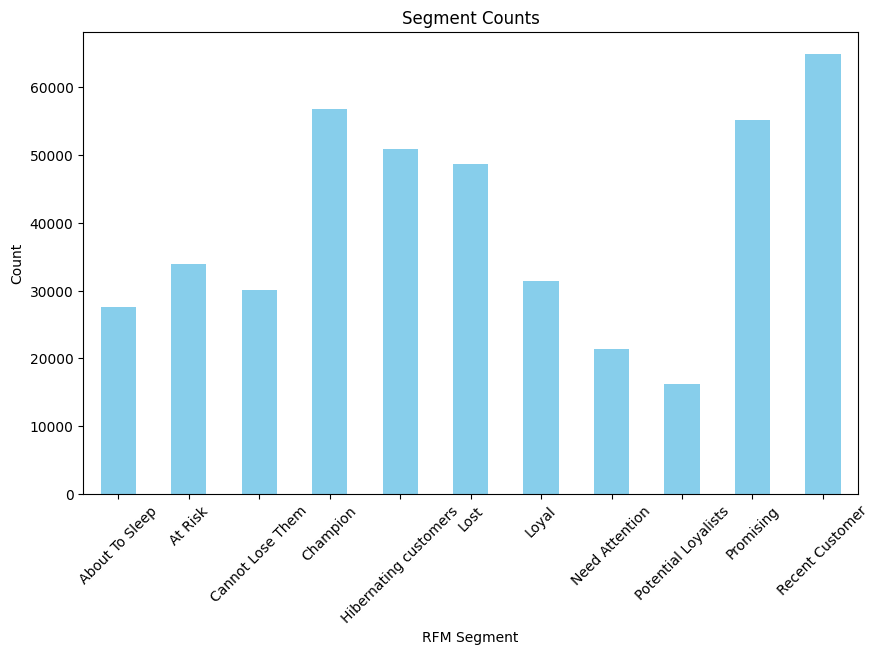

In [26]:
# Plot the count of each segment class
segment_counts = rfm_df['RFM_Segment'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Segment Counts')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [27]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the 'Recency', 'Frequency', and 'Monetary' columns
rfm_df_normalized = rfm_df.copy()
rfm_df_normalized[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm_df_normalized[['Recency', 'Frequency', 'Monetary']])
rfm_df_normalized[['Member_ID', 'Recency',  'Frequency',  'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Segment']].to_csv('rfm_segment_normalized.csv', index=True)

# Normalize the 'Recency', 'Frequency', and 'Monetary' columns
rfm_prev_df_normalized = rfm_prev_df.copy()
rfm_prev_df_normalized[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm_prev_df_normalized[['Recency', 'Frequency', 'Monetary']])
rfm_prev_df_normalized[['Member_ID', 'Recency',  'Frequency',  'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Segment']].to_csv('rfm_segment_normalized_prev.csv', index=True)

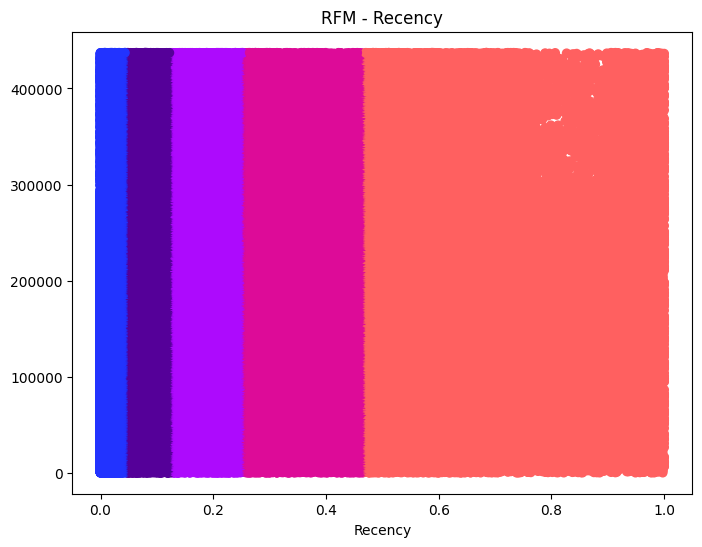

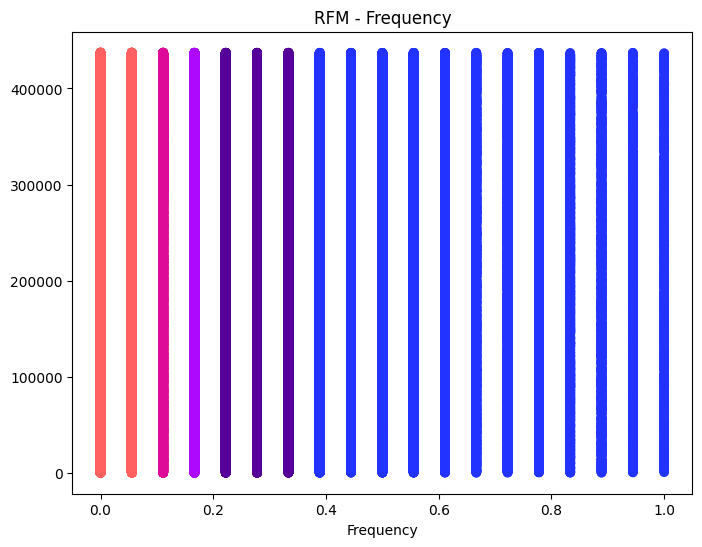

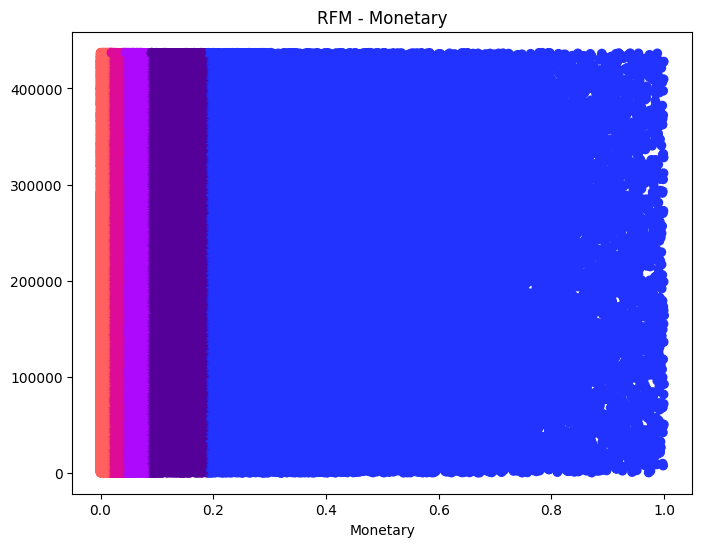

In [28]:
individual_segment = {
    'High': "#2233FF",
    'Mid-High': "#550099",
    'Mid': "#AD0AFD",
    'Mid-Low': "#DD0B98",
    'Low': "#FF6060"
}

# Plot Recency with individual segment colors
plt.figure(figsize=(8, 6))
plt.scatter(rfm_df_normalized['Recency'], rfm_df_normalized.index, c=rfm_df_normalized['R'].map(individual_segment))
plt.xlabel('Recency')
plt.title('RFM - Recency')
plt.show()

# Plot Frequency with individual segment colors
plt.figure(figsize=(8, 6))
plt.scatter(rfm_df_normalized['Frequency'], rfm_df_normalized.index, c=rfm_df_normalized['F'].map(individual_segment))
plt.xlabel('Frequency')
plt.title('RFM - Frequency')
plt.show()

# Plot Monetary with individual segment colors
plt.figure(figsize=(8, 6))
plt.scatter(rfm_df_normalized['Monetary'], rfm_df_normalized.index, c=rfm_df_normalized['M'].map(individual_segment))
plt.xlabel('Monetary')
plt.title('RFM - Monetary')
plt.show()


In [29]:
RFM_count_percentile = get_count_percentile(rfm_df_normalized)
RFM_count_percentile_prev = get_count_percentile(rfm_prev_df_normalized)


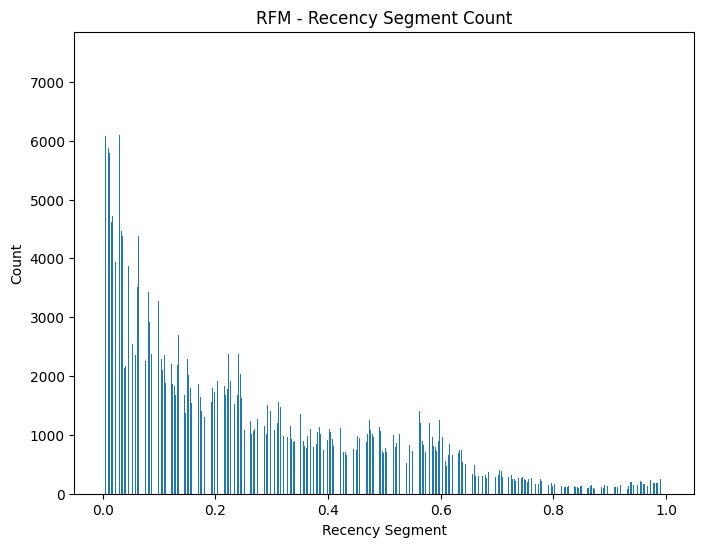

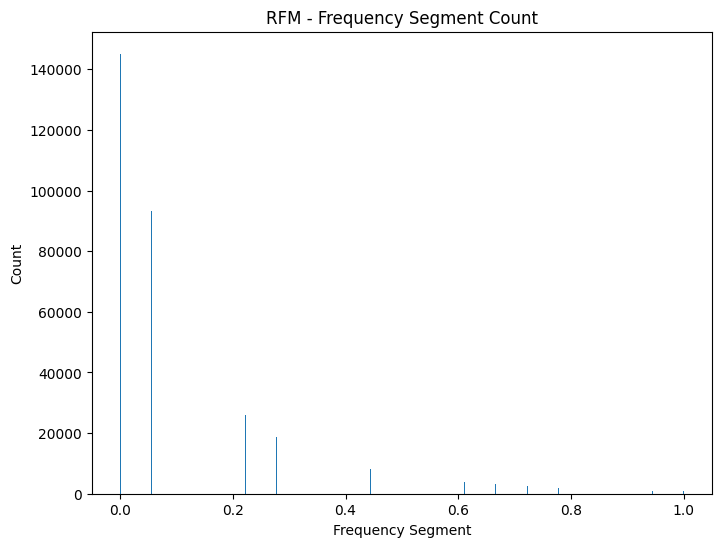

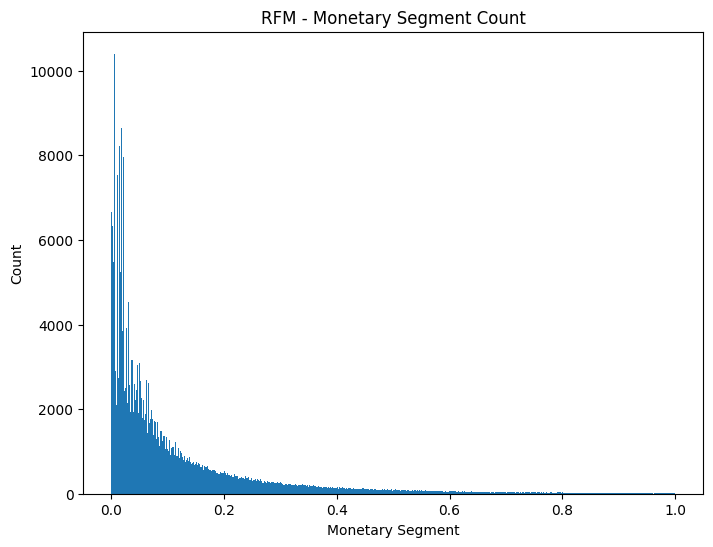

In [30]:
# Number of bins for the histograms
num_bins = 1000

# Plot the histogram for Recency
plt.figure(figsize=(8, 6))
plt.hist(rfm_df_normalized['Recency'], bins=num_bins)
plt.xlabel('Recency Segment')
plt.ylabel('Count')
plt.title('RFM - Recency Segment Count')
plt.show()

# Plot the histogram for Frequency
plt.figure(figsize=(8, 6))
plt.hist(rfm_df_normalized['Frequency'], bins=num_bins)
plt.xlabel('Frequency Segment')
plt.ylabel('Count')
plt.title('RFM - Frequency Segment Count')
plt.show()

# Plot the histogram for Monetary
plt.figure(figsize=(8, 6))
plt.hist(rfm_df_normalized['Monetary'], bins=num_bins)
plt.xlabel('Monetary Segment')
plt.ylabel('Count')
plt.title('RFM - Monetary Segment Count')
plt.show()


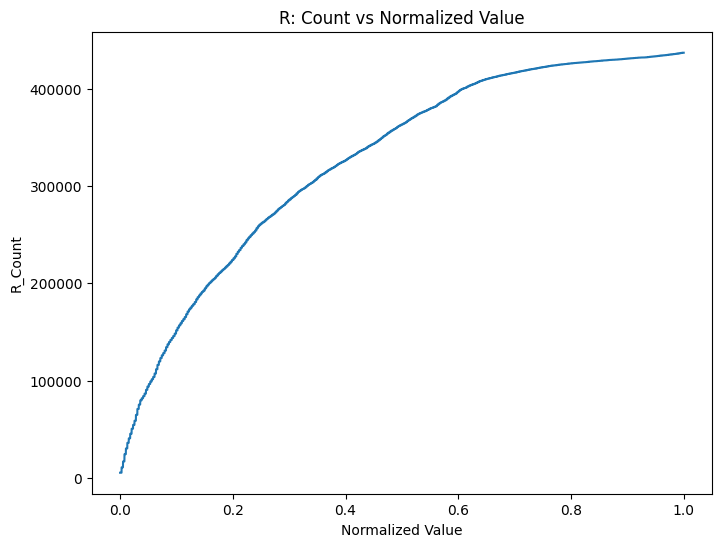

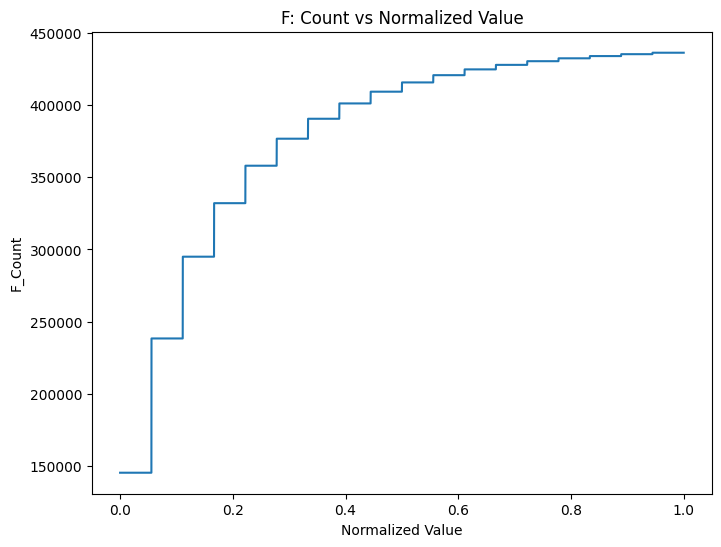

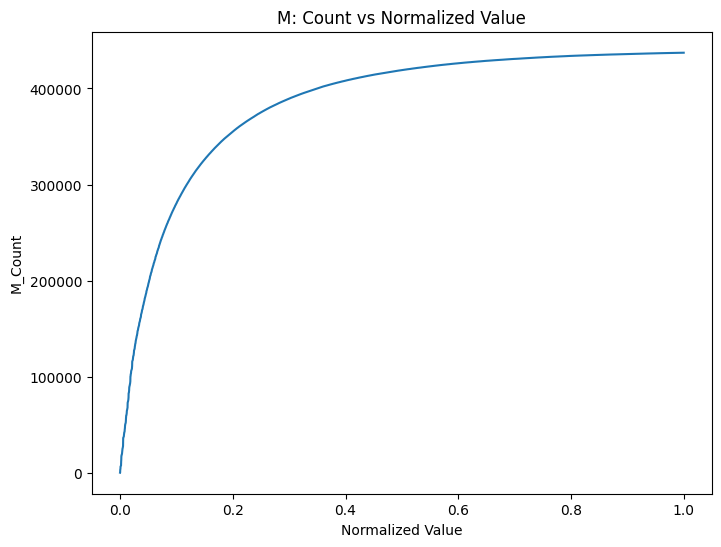

In [31]:
# Plot R count-percentile
plt.figure(figsize=(8, 6))
plt.plot(RFM_count_percentile['Normalized_value'], RFM_count_percentile['R_Count'])
plt.xlabel('Normalized Value')
plt.ylabel('R_Count')
plt.title('R: Count vs Normalized Value')
plt.show()

# Plot F count-percentile
plt.figure(figsize=(8, 6))
plt.plot(RFM_count_percentile['Normalized_value'], RFM_count_percentile['F_Count'])
plt.xlabel('Normalized Value')
plt.ylabel('F_Count')
plt.title('F: Count vs Normalized Value')
plt.show()

# Plot M count-percentile
plt.figure(figsize=(8, 6))
plt.plot(RFM_count_percentile['Normalized_value'], RFM_count_percentile['M_Count'])
plt.xlabel('Normalized Value')
plt.ylabel('M_Count')
plt.title('M: Count vs Normalized Value')
plt.show()

C:\Users\Kunnithi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


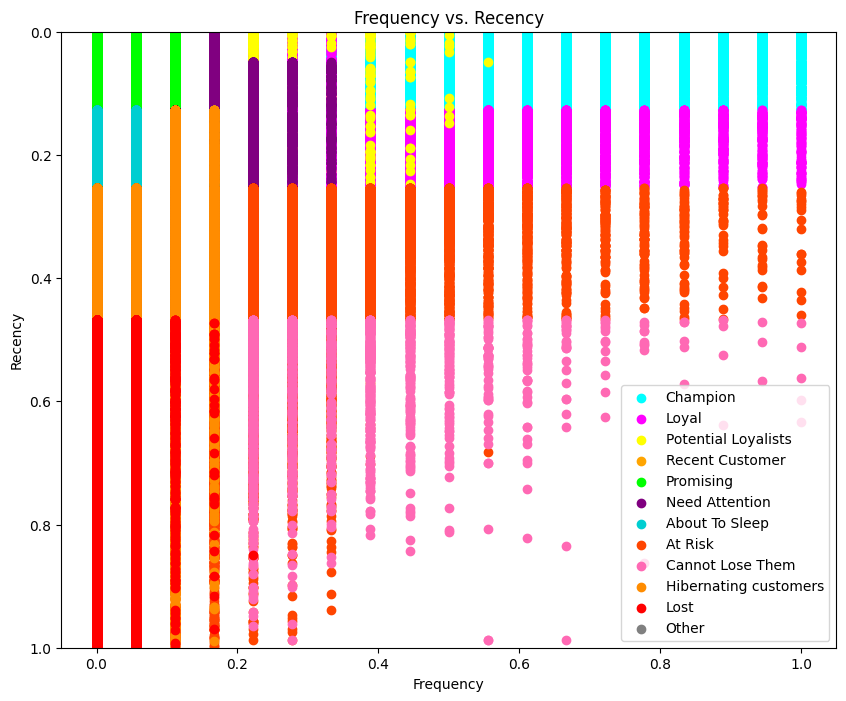

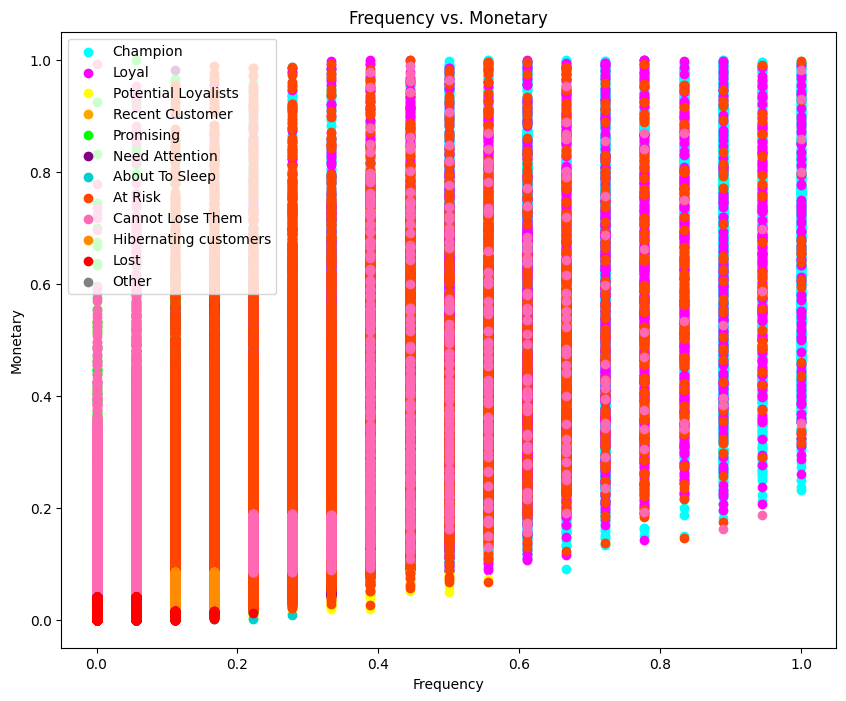

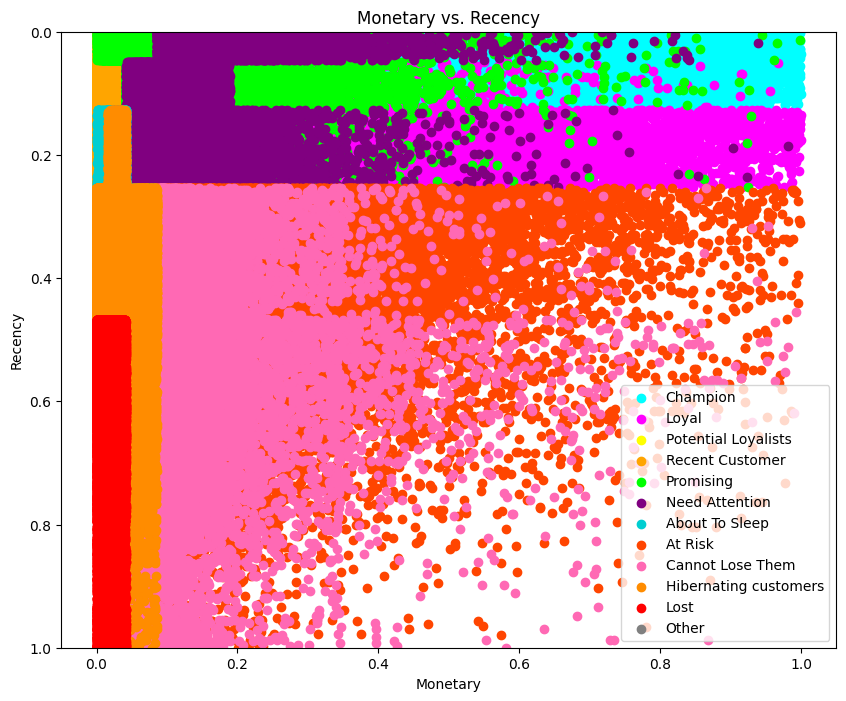

In [32]:
segment_colors = {
    'Champion': '#00FFFF',                  # Cyan
    'Loyal': '#FF00FF',                     # Magenta
    'Potential Loyalists': '#FFFF00',       # Yellow
    'Recent Customer': '#FFA500',           # Orange
    'Promising': '#00FF00',                 # Lime
    'Need Attention': '#800080',            # Purple
    'About To Sleep': '#00CED1',            # Dark Turquoise
    'At Risk': '#FF4500',                   # Orange Red
    'Cannot Lose Them': '#FF69B4',          # Hot Pink
    'Hibernating customers': '#FF8C00',     # Dark Orange
    'Lost': '#FF0000',                      # Red
    'Other': '#808080'                      # Gray
}

# Frequency vs. Recency scatter plot
plt.figure(figsize=(10, 8))
for segment, color in segment_colors.items():
    segment_data = rfm_df_normalized[rfm_df_normalized['RFM_Segment'] == segment]
    plt.scatter(segment_data['Frequency'], segment_data['Recency'], c=color, label=segment)
    
max_recency = rfm_df_normalized['Recency'].max()
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.title('Frequency vs. Recency')
plt.ylim(max_recency, 0)
plt.legend()
plt.show()

# Frequency vs. Monetary scatter plot
plt.figure(figsize=(10, 8))
for segment, color in segment_colors.items():
    segment_data = rfm_df_normalized[rfm_df_normalized['RFM_Segment'] == segment]
    plt.scatter(segment_data['Frequency'], segment_data['Monetary'], c=color, label=segment)

plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs. Monetary')
plt.legend()
plt.show()

# Monetary vs. Recency scatter plot
plt.figure(figsize=(10, 8))
for segment, color in segment_colors.items():
    segment_data = rfm_df_normalized[rfm_df_normalized['RFM_Segment'] == segment]
    plt.scatter(segment_data['Monetary'], segment_data['Recency'], c=color, label=segment)

plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.title('Monetary vs. Recency')
plt.ylim(max_recency, 0)
plt.legend()
plt.show()


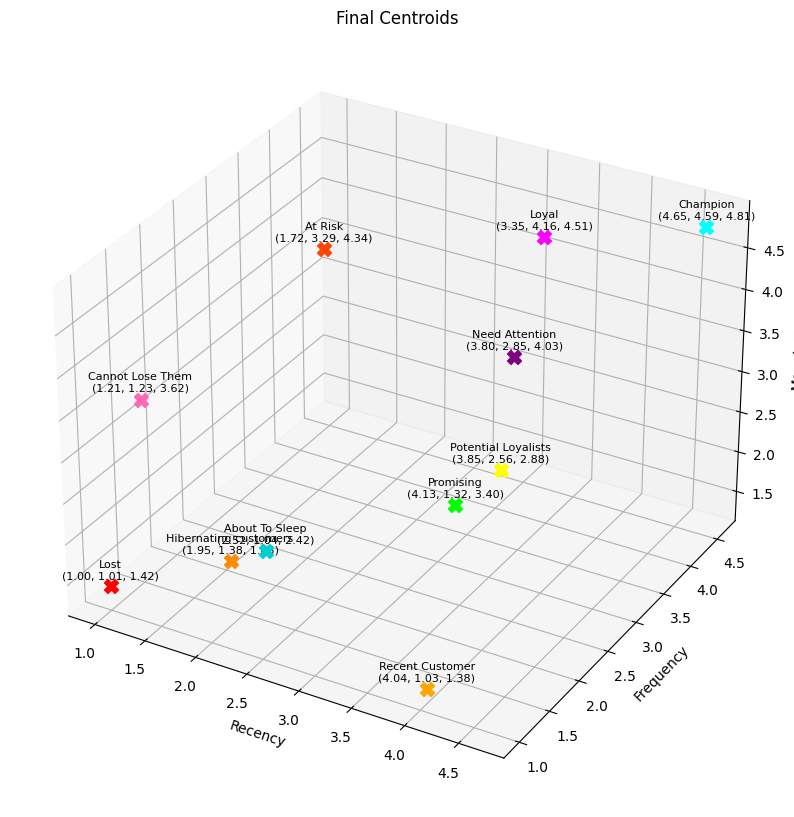

In [33]:
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Iterate over each centroid
for segment, centroid in segment_centroids.iterrows():
    r_score = centroid['R_Score']
    f_score = centroid['F_Score']
    m_score = centroid['M_Score']
    
    # Assign the color based on the segment label using the segment_colors dictionary
    color = segment_colors.get(segment, 'black')
    
    # Plot the centroid with the corresponding color
    ax.scatter(r_score, f_score, m_score, c=color, marker='X', s=100)
    
    # Define the distance of the text from the point
    text_distance = 0.2
    
    # Add the segment name as text above the point
    ax.text(r_score, f_score, m_score + text_distance, f'{segment}\n({r_score:.2f}, {f_score:.2f}, {m_score:.2f})', 
            color='black', fontsize=8, ha='center', va='center')

# Set labels for each axis
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.title('Final Centroids')
plt.show()


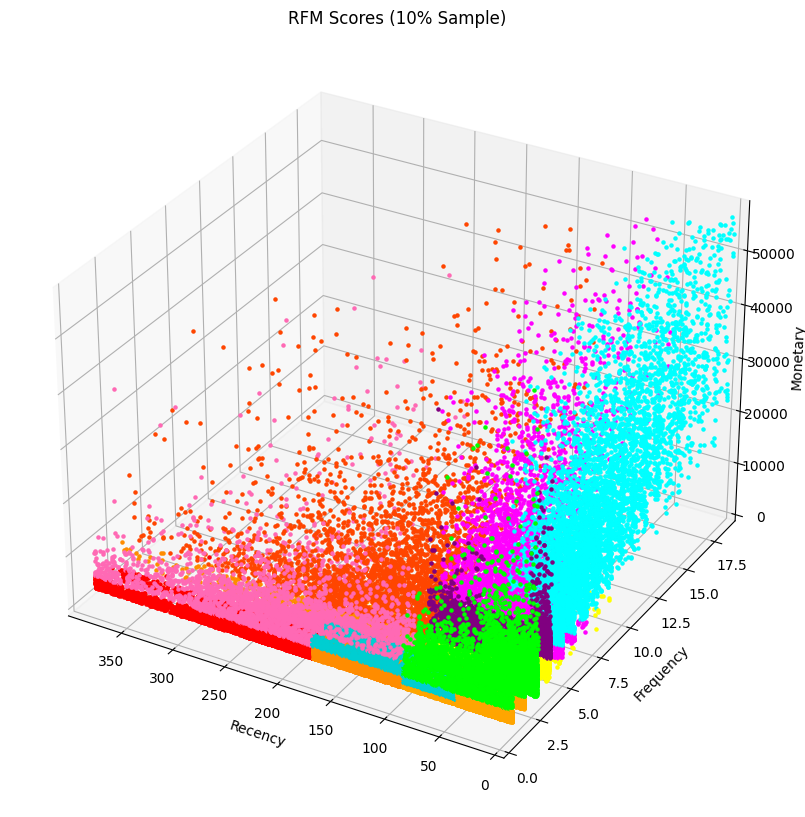

In [34]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Calculate the number of rows to separate
num_rows = int(len(rfm_df) * 0.1)

# Separate data randomly
sample_df = rfm_df.sample(n=num_rows)

# Iterate over each row in the sample_df
for index, row in sample_df.iterrows():
    # Get the segment label for the current row
    segment = row['RFM_Segment']
    
    # Assign the color based on the segment label using direct dictionary lookup
    color = segment_colors.get(segment, 'black')
    
    # Plot RFM scores with the corresponding color
    ax.scatter(row['Recency'], row['Frequency'], row['Monetary'], c=color, marker='o', s=5)

# Set labels for each axis
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Get the maximum Recency value from the data
max_recency = sample_df['Recency'].max()

# Set axis limits in reverse order (highest to lowest)
ax.set_xlim(max_recency, 0)
ax.set_ylim(0, sample_df['Frequency'].max())
ax.set_zlim(0, sample_df['Monetary'].max())

plt.title('RFM Scores (10% Sample)')
plt.show()
